In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
features= ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [4]:
df=pd.read_csv(r'/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv', usecols=features)

df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
print(df.shape)

(48895, 10)


In [6]:
df.isnull().sum()

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
df.isnull().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Question 1
What is the most frequent observation (mode) for the column `neighbourhood_group`?

### Frequent Values

In [9]:
df.describe(include=['O'])

,neighbourhood_group,room_type
count,48895,48895
unique,5,3
top,Manhattan,Entire home/apt
freq,21661,25409


In [10]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

## Answer for Question 1=='Manhattan'

## Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.


## Question 2
* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
     * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [11]:
df_numeric=df.copy()
df_numeric-df.drop(['neighbourhood_group', 'room_type', 'price'], axis=1)

df_numeric.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Correlation Calculation

In [12]:
df_numeric.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


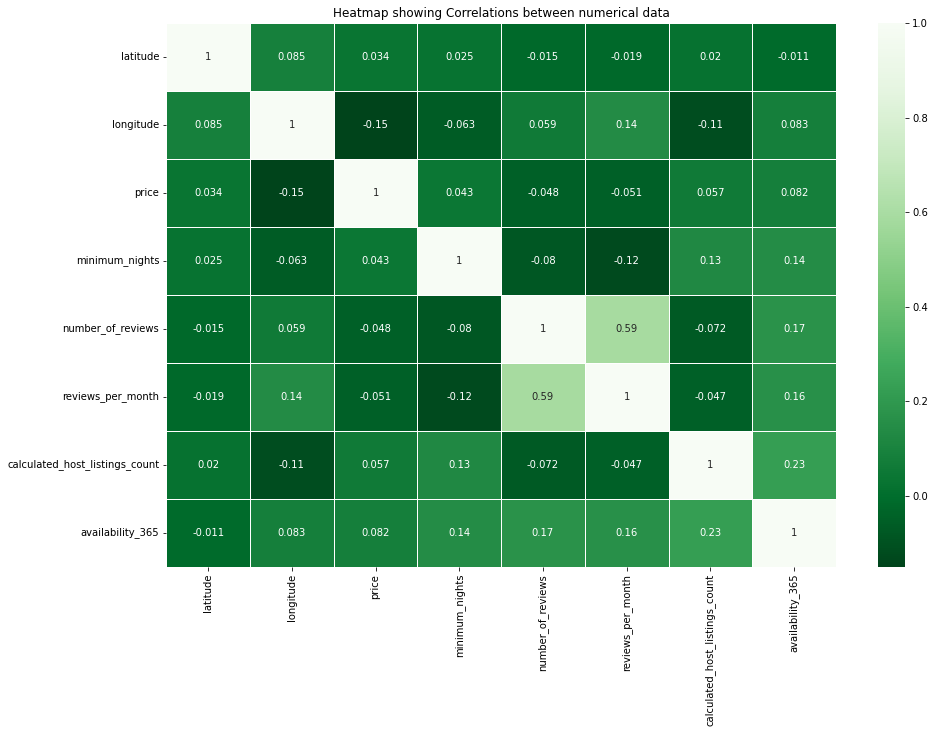

In [13]:
plt.figure(figsize=(15,10))

sns.heatmap(df_numeric.corr(), annot=True, linewidths=.5, cmap='Greens_r')

plt.title("Heatmap showing Correlations between numerical data")

plt.show()

## Answer no 2: 
Highest correlation is between the reviews_per_month and the number_of_reviews

## Make price binary
* We need to turn the price variable from numeric into binary.
* Let's create a variable `above_average` which is 1 if the price is above (or equal to) `152`.

In [14]:
data=df.copy()
mean=data['price'].mean()
mean

152.7206871868289

In [15]:
data['above_average']=np.where(data['price']>=mean,1,0)
data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,1
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,0


In [16]:
data=data.drop('price', axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test=train_test_split(data,test_size=0.2, random_state=42)

In [19]:
df_train, df_val=train_test_split(df_full_train,test_size=0.25, random_state=42)

In [20]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [21]:
# Target variable
y_train=df_train.above_average.values
y_val=df_val.above_average.values
y_test=df_test.above_average.values

## Question 3
* Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
* Which of these two variables has bigger score?
* Round it to 2 decimal digits using `round(score, 2)`

In [22]:
from sklearn.metrics import mutual_info_score

In [23]:
categorical=['neighbourhood_group','room_type']

In [24]:
def calculate_mi(series):
    return round(mutual_info_score(series, df_train.above_average),2)

df_mi=df_train[categorical].apply(calculate_mi)

df_mi=df_mi.sort_values(ascending=False).to_frame(name='MI')

In [25]:
# dropping the target variable from the dataframes
df_train=df_train.drop('above_average', axis=1)
df_val=df_val.drop('above_average', axis=1)
df_test=df_test.drop('above_average', axis=1)

### Answer for Question 3; Room Type

In [26]:
df_mi

,MI
room_type,0.14
neighbourhood_group,0.05


# Question 4
* Now let's train a logistic regression
* * Remember that we have two categorical variables in the data. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * `model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

## Finding the accuracy of the classfication model

In [27]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
num=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [29]:
train_dicts=df_train[categorical+ num].to_dict(orient='records')

In [30]:
dv=DictVectorizer(sparse=False)

X_train=dv.fit_transform(train_dicts)

X_train[-1:]

array([[281.     ,   2.     ,  40.64438, -73.95484,   7.     ,   0.     ,
          1.     ,   0.     ,   0.     ,   0.     ,  15.     ,   0.49   ,
          1.     ,   0.     ,   0.     ]])

In [31]:
dv.get_feature_names()

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood_group=Bronx',
 'neighbourhood_group=Brooklyn',
 'neighbourhood_group=Manhattan',
 'neighbourhood_group=Queens',
 'neighbourhood_group=Staten Island',
 'number_of_reviews',
 'reviews_per_month',
 'room_type=Entire home/apt',
 'room_type=Private room',
 'room_type=Shared room']

## Model

In [32]:
model=LogisticRegression(solver='liblinear', C=1.0, random_state=42)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [34]:
val_dict=df_val[categorical+num].to_dict(orient='records')

X_val=dv.transform(val_dict)


y_pred=model.predict(X_val)

In [35]:
accuracy=np.round(accuracy_score(y_val, y_pred),4)

print(accuracy)

0.7903


## Answer Q4 is : 0.79

## Question 5
* We have 9 features: 7 numerical features and 2 categorical.
* Let's find the least useful one using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
    * `neighbourhood_group`
    * `room_type`
    * `number_of_reviews`
    * `reviews_per_month`
    >note: the difference doesn't have to be positive

In [36]:
features=categorical + num
features

['neighbourhood_group',
 'room_type',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Feature Elimination Technique

In [37]:
orig_score=accuracy

for c in features:
    f_cut=features.copy()
    f_cut.remove(c)
    
    train_dict=df_train[f_cut].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    
    
    X_train=dv.fit_transform(train_dict)
    
    model=LogisticRegression(solver='liblinear', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    
    val_dict=df_val[f_cut].to_dict(orient='records')
    
    X_val=dv.transform(val_dict)
    
    y_pred=model.predict(X_val)
    
    
    score=accuracy_score(y_pred,y_val)
    
    
    print(c, round((orig_score- score), 7),  round((score), 4))

neighbourhood_group 0.040121 0.7502
room_type 0.0612889 0.729
latitude 0.0041255 0.7862
longitude 0.0044323 0.7859
minimum_nights -6.71e-05 0.7904
number_of_reviews 0.0001374 0.7902
reviews_per_month 0.0001374 0.7902
calculated_host_listings_count 0.0012623 0.789
availability_365 0.0094431 0.7809


### Answer 5: "Number of Reviews" has the smallest difference

## Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'price'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
If there are multiple options, select the smallest `alpha`.

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [39]:
df.price=np.log1p(df.price)

In [40]:
df['price'].shape

(48895,)

In [41]:
df_full_train, df_test=train_test_split(df, test_size=0.2, random_state=1)

In [42]:
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=11)

In [43]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

df_test=df_test.reset_index(drop=True)



In [44]:
y_train=df_train.price.values
y_val=df_val.price.values
y_test=df_test.price.values

In [45]:
y_train.shape

(29337,)

In [46]:
X_train.shape

(29337, 14)

In [47]:
del df_train['price']
del df_val['price']
del df_test['price']


# Ridge Regression

In [48]:
train_dict=df_train[categorical+num].to_dict(orient='records')

In [49]:
dv=DictVectorizer(sparse=False)



X_train=dv.fit_transform(train_dict)
val_dict=df_val[categorical+num].to_dict(orient='records')
    
X_val=dv.transform(val_dict)

In [50]:
for a in [0, 0.01, 0.1, 1, 10]:
    model=Ridge(alpha=a, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred=model.predict(X_val)
    
    
    score=np.sqrt(mean_squared_error(y_val, y_pred))
    
    
    print(a, round(score, 3))

0 0.497
0.01 0.496
0.1 0.496
1 0.496
10 0.497


## Answer is 0